In [ ]:
# download example data
from downloaddata import download_example_data
download_example_data()

In [ ]:
data = download_example_data()

In [2]:
from wholeslidedata.iterators import create_batch_iterator
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import init_plot, plot_batch, show_plot
from shapely.prepared import prep

# BatchIterator 

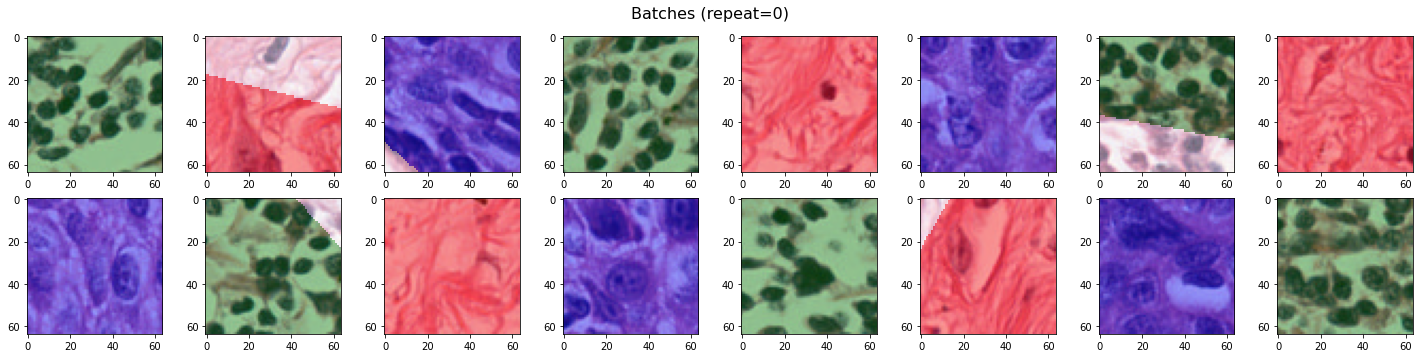

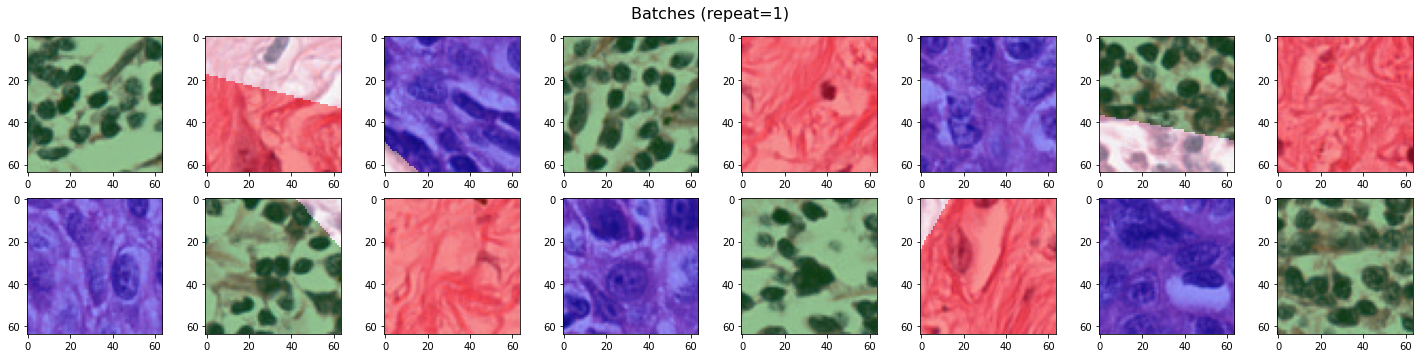

In [3]:
user_config = './configs/user_config.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
cpus = 1
mode = 'training'

with create_batch_iterator(user_config=user_config, 
                            number_of_batches=batches, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    dataset = training_batch_generator._builds['wholeslidedata']['training']['dataset']
    
    for r in range(repeats):
        fig, axes = init_plot(batches, training_batch_generator.batch_size)
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
            pass
            plot_batch(axes, idx, x_batch, y_batch)
        show_plot(fig, r)

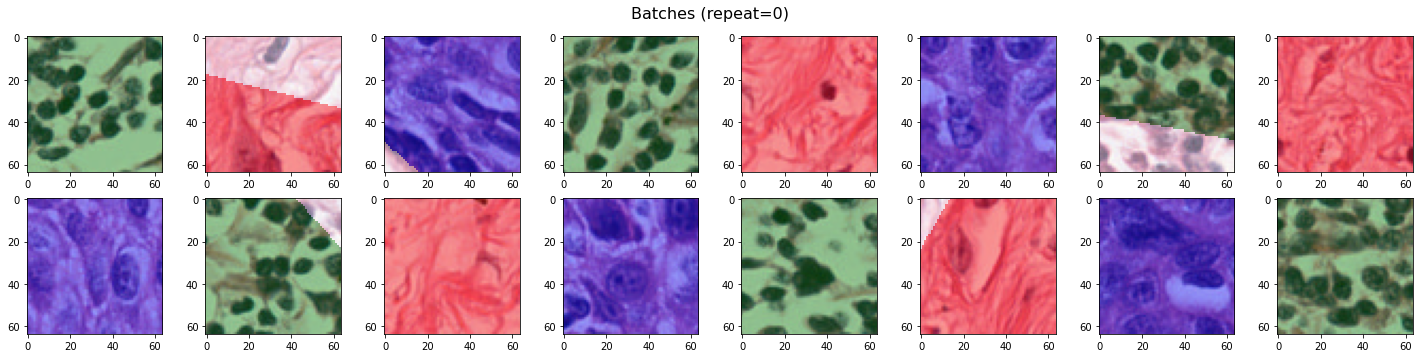

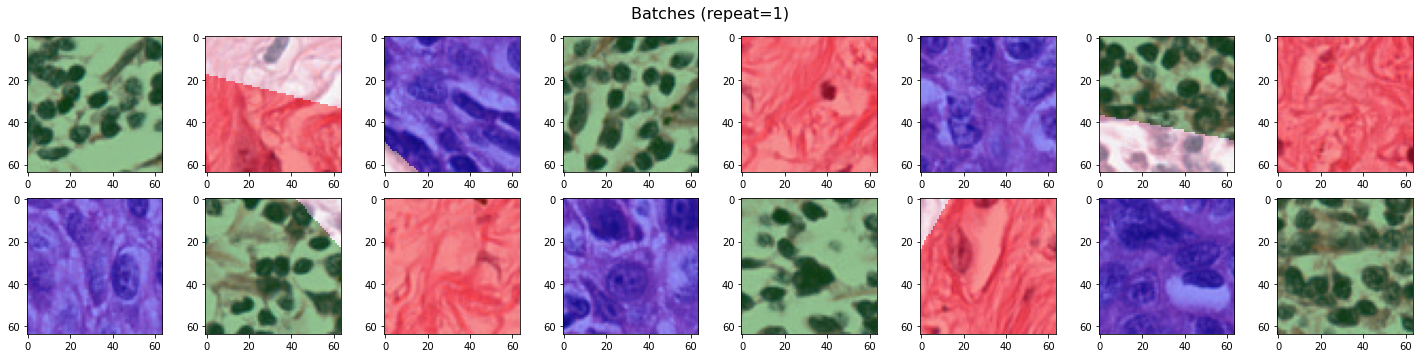

In [4]:
user_config = './configs/user_config.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
cpus = 4
mode = 'training'

with create_batch_iterator(user_config=user_config, 
                            number_of_batches=batches, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    dataset = training_batch_generator._builds['wholeslidedata']['training']['dataset']
    for r in range(repeats):
        fig, axes = init_plot(batches, training_batch_generator.batch_size)
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
            pass
            plot_batch(axes, idx, x_batch, y_batch)
        show_plot(fig, r)

# Infinite BatchIterator 

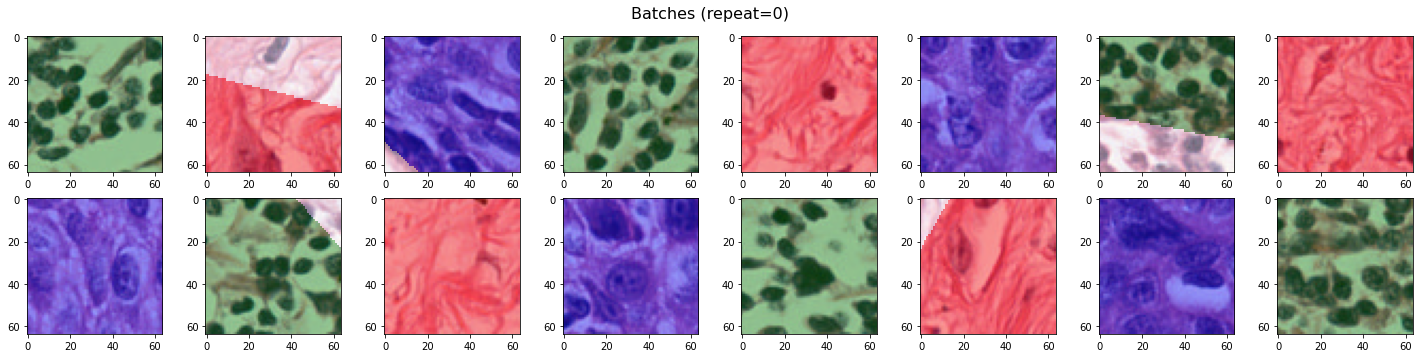

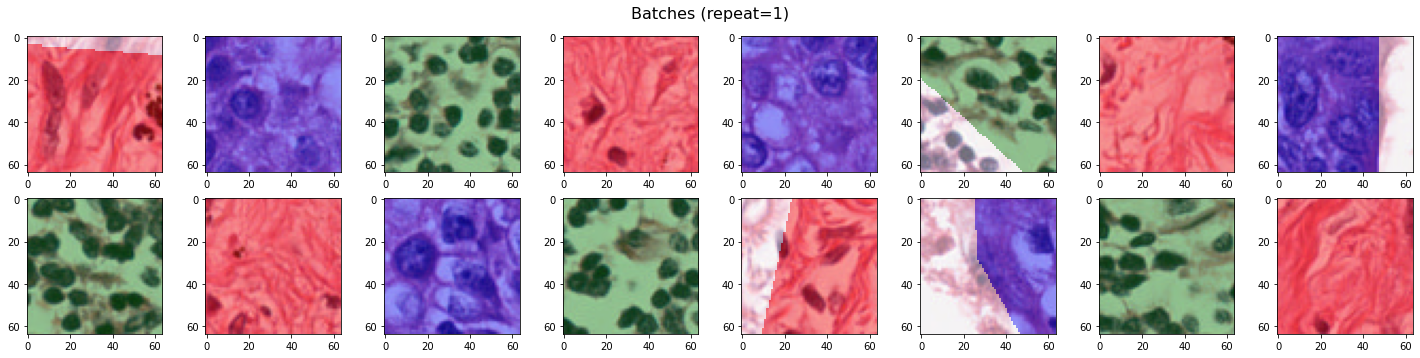

In [5]:
user_config = './configs/user_config.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
cpus = 4
mode = 'training'

with create_batch_iterator(user_config=user_config, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    
    for r in range(repeats):
        fig, axes = init_plot(batches,training_batch_generator.batch_size)
        for idx in range(batches):
            x_batch, y_batch, info = next(training_batch_generator)
            plot_batch(axes, idx, x_batch, y_batch)
        show_plot(fig, r)

# One Hot Encoding

In [6]:
user_config = './configs/one-hot-encoded.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
cpus=4
mode = 'training'

with create_batch_iterator(user_config=user_config, 
                           number_of_batches=batches,
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    
    for r in range(repeats):
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
            print(f'repeat {r}, batch {idx}, \n on-hot-encoded y-batch shape: {y_batch.shape}, np_unique: {np.unique(y_batch)}\n')

repeat 0, batch 0, 
 on-hot-encoded y-batch shape: (8, 256, 256, 3), np_unique: [0 1]

repeat 0, batch 1, 
 on-hot-encoded y-batch shape: (8, 256, 256, 3), np_unique: [0 1]

repeat 1, batch 0, 
 on-hot-encoded y-batch shape: (8, 256, 256, 3), np_unique: [0 1]

repeat 1, batch 1, 
 on-hot-encoded y-batch shape: (8, 256, 256, 3), np_unique: [0 1]



# Presets

In [7]:
user_config = './configs/user_config.yml'
batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 2
cpus = 4
mode = 'training'
presets= ('classification', )

with create_batch_iterator(user_config=user_config, 
                           number_of_batches=batches,
                            mode=mode, 
                            cpus=cpus,
                            presets=presets) as training_batch_generator:
    
    for r in range(repeats):
        for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
            print(f'repeat {r}, batch {idx}, \nclassification labels\n{y_batch}\n')

repeat 0, batch 0, 
classification labels
[[3]
 [1]
 [2]
 [3]
 [1]
 [2]
 [3]
 [1]]

repeat 0, batch 1, 
classification labels
[[2]
 [3]
 [1]
 [2]
 [3]
 [1]
 [2]
 [3]]

repeat 1, batch 0, 
classification labels
[[3]
 [1]
 [2]
 [3]
 [1]
 [2]
 [3]
 [1]]

repeat 1, batch 1, 
classification labels
[[2]
 [3]
 [1]
 [2]
 [3]
 [1]
 [2]
 [3]]

